In [1]:
!pip3 install opencv-python
!pip3 install tensorflow seaborn


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
# Import Libararies
import numpy as np
import cv2
import os
import tensorflow as tf
import keras
from keras.layers import Conv2D, Flatten, BatchNormalization, Dense, MaxPooling2D,Dropout
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import Adam
from keras.models import Sequential
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

/Users/anushkasharma/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
# Loading dataset
data_dir = "data/chest_xray/train"

In [4]:
# Accessing classes
sub_folders = os.listdir(data_dir)
print(len(sub_folders))

2


In [5]:
images = []
labels = []
for sub_folder in sub_folders:
    label = sub_folder
    
    # Constructing the path to the current sub_folder
    path = os.path.join(data_dir, sub_folder)
    
    # Listing all the images in the sub_folder
    sub_folder_images = os.listdir(path)
    
    for image_name in sub_folder_images:
        
        # Constructing the path of current image
        image_path = os.path.join(path, image_name)
        
        # Loading the image using OpenCV
        img = cv2.imread(image_path)
        
        img = cv2.resize(img, (256, 256))
        
        # Append the images to the image list 
        images.append(img)
        
        # Append the labels
        labels.append(label)

In [6]:
# list of images and labels to the numpy array
images = np.array(images)
labels = np.array(labels)

In [7]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Further splitting the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [8]:
def preprocessing(img):
    img = img / 255.0
    return img

In [9]:
# Applying the preprocessing to the entire dataset
X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

In [10]:
# Data Augmentation
data_gen = ImageDataGenerator(
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    rotation_range = 10,
    shear_range = 0.1
    )

In [11]:
# Label Encoder
label_encoder = LabelEncoder()
label_encoder.fit(labels)
# Encode the labels
y_train = label_encoder.transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

In [12]:
# Number of Classes
num_classes = len(label_encoder.classes_)
# Converting the labels into One-Hot encoding
y_train = to_categorical(y_train, num_classes = num_classes)
y_val = to_categorical(y_val, num_classes = num_classes)
y_test = to_categorical(y_test, num_classes = num_classes)

In [13]:
def build_model():
    model = Sequential()
    
    model.add(Conv2D(32, (5,5), strides=(1,1), padding='same', activation='relu', input_shape=(256, 256, 3)))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(64, (3,3), strides=(1,1), padding='same', activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(128, (3,3), strides=(1,1), padding='same', activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(256, (3,3), strides=(1,1), padding='same', activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(512, (3,3), strides=(1,1), padding='same', activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(32, (3,3), strides=(1,1), padding='same', activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(num_classes, activation='sigmoid'))
    
    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [14]:
model = build_model()

print(model.summary())

/Users/anushkasharma/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 32)       │       147,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         2,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,507,618 (9.57 MB)

 Trainable params: 2,507,618 (9.57 MB)

 Non-trainable params: 0 (0.00 B)

None


In [15]:
# Train the model
history = model.fit(data_gen.flow(X_train, y_train, batch_size = 32),
                   validation_data = (X_val, y_val),
                   epochs = 30,
                   verbose = 2)

Epoch 1/30


/Users/anushkasharma/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


118/118 - 99s - 842ms/step - accuracy: 0.7419 - loss: 0.5899 - val_accuracy: 0.7560 - val_loss: 0.6768
Epoch 2/30
118/118 - 96s - 812ms/step - accuracy: 0.7475 - loss: 0.5790 - val_accuracy: 0.7560 - val_loss: 0.6701
Epoch 3/30
118/118 - 95s - 802ms/step - accuracy: 0.7475 - loss: 0.5757 - val_accuracy: 0.7560 - val_loss: 0.6580
Epoch 4/30
118/118 - 94s - 800ms/step - accuracy: 0.7475 - loss: 0.5729 - val_accuracy: 0.7560 - val_loss: 0.6452
Epoch 5/30
118/118 - 96s - 811ms/step - accuracy: 0.7475 - loss: 0.5705 - val_accuracy: 0.7560 - val_loss: 0.6444
Epoch 6/30
118/118 - 151s - 1s/step - accuracy: 0.7475 - loss: 0.5580 - val_accuracy: 0.7560 - val_loss: 0.6120
Epoch 7/30
118/118 - 92s - 778ms/step - accuracy: 0.7475 - loss: 0.5289 - val_accuracy: 0.7560 - val_loss: 0.5543
Epoch 8/30
118/118 - 93s - 791ms/step - accuracy: 0.7544 - loss: 0.3873 - val_accuracy: 0.8230 - val_loss: 0.3887
Epoch 9/30
118/118 - 94s - 796ms/step - accuracy: 0.8828 - loss: 0.2739 - val_accuracy: 0.8493 - val_

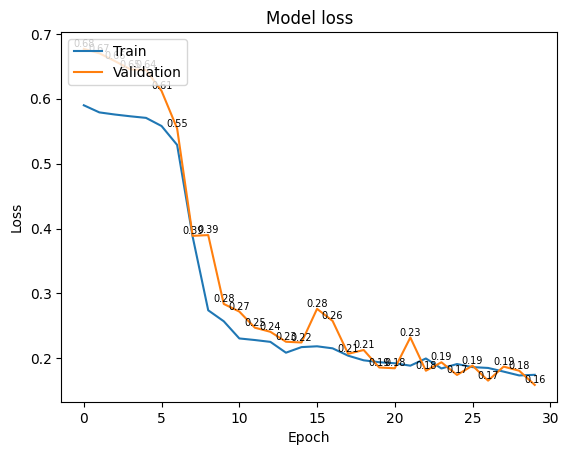

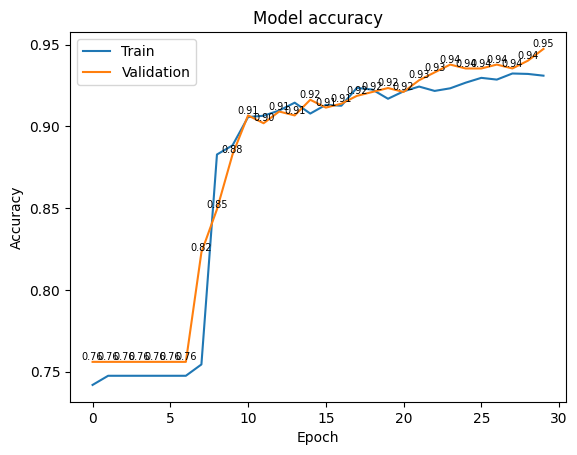

In [16]:
import matplotlib.pyplot as plt

def plot_loss_accuracy(history):
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    for i, loss in enumerate(history.history['val_loss']):
        plt.text(i, loss, f'{loss:.2f}', ha='center', va='bottom', fontsize=7)

    plt.show()

    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    for i, acc in enumerate(history.history['val_accuracy']):
        plt.text(i, acc, f'{acc:.2f}', ha='center', va='bottom', fontsize=7)

    plt.show()

plot_loss_accuracy(history)

In [17]:
model.save('model.h5')

33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 194ms/step


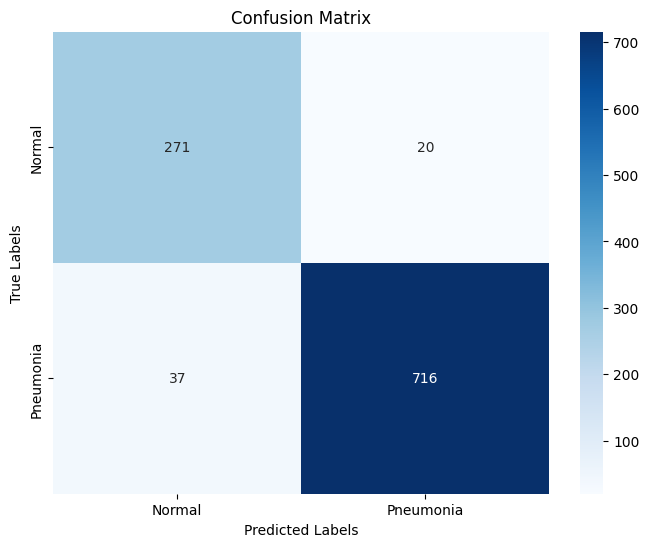

In [18]:
# Predicting labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Converting one-hot encoded test labels back to categorical labels
y_true = np.argmax(y_test, axis=1)

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [19]:
# Accuracy
accuracy = accuracy_score(y_true, y_pred_classes)

# Precision
precision = precision_score(y_true, y_pred_classes)

# Recall
recall = recall_score(y_true, y_pred_classes)

# F1 Score
f1 = f1_score(y_true, y_pred_classes)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_classes)
roc_auc = auc(fpr, tpr)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {roc_auc:.2f}")

Accuracy: 0.95
Precision: 0.97
Recall: 0.95
F1 Score: 0.96
AUC: 0.94


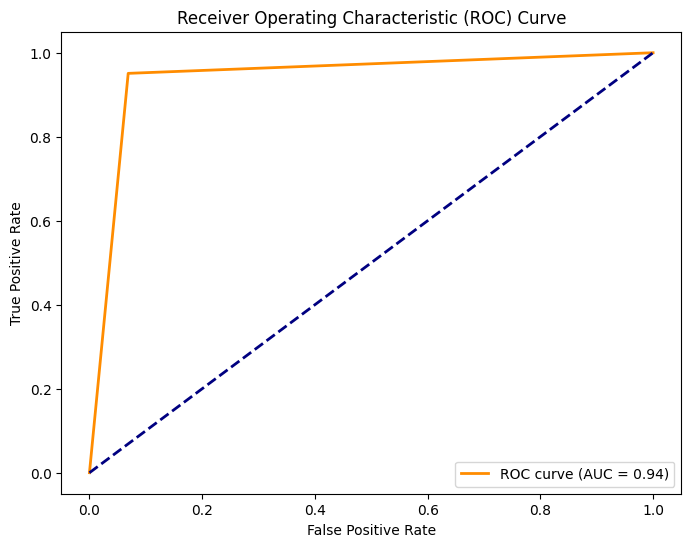

In [20]:
# Visualization of ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()